In [1]:
import numpy as np
%load_ext autoreload
%autoreload 2

import torch
import sys

sys.path.append('..')

from algorithms.sequence_models.config import TrainConfig

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("device is ", device)

device is  cpu


In [3]:
from envs.random_walk import RandomWalkEnv
from data.random_walk_dataset import RandomWalkDataset
from algorithms.sequence_models.decision_S4.dts4 import DecisionS4
from comparison_experiment import AutomatedComparisonExperiment
import gymnasium as gym


env = RandomWalkEnv(num_nodes=10, weight_max=10, reach_the_goal_reward=32, max_episode_length=20)
config = TrainConfig(max_eval_ep_len=20, context_len=25)


n_trajectories = 20_000 # todo is this enough / too much?
experiment_name = f"experiment_rw_dataset_size={n_trajectories}"
# reward_scale = 1 # todo change for other envs
traj_dataset = RandomWalkDataset(env, n_trajectories=n_trajectories, reward_scale=32)
traj_dataset.save(experiment_name)

comparison_experiment = AutomatedComparisonExperiment(
    env=env,
    traj_dataset=traj_dataset,
    config=config,
    device=device,
    rtgs_for_train_eval=np.linspace(-50, 50, 10, endpoint=True), # todo change for other envs
    rtgs_final_test=np.linspace(-50, 50, 50, endpoint=True), # todo change for other envs
    env_name=f"random-walk", # todo change for other envs
    experiment_name="rw-final-test", # todo change for other envs
)

collecting trajectories:   0%|          | 0/20000 [00:00<?, ?it/s]

Dataset Info:
episode_max_length: 20
reward_scale: 32
return min=-139, max=31 mean=-11.336142497097386
state_mean: [0.21122533 0.09928921 0.09840569 0.09931753 0.0989947  0.09759012
 0.09762977 0.0992609  0.09828675 0.        ]
state_std: [0.40817789 0.29904994 0.2978624  0.29908788 0.29865491 0.29675965
 0.2968134  0.29901199 0.29770197 0.        ]
gamma: 1
s4 : number of parameters 596373
dt : number of parameters 1125141


In [5]:
epoch = 100

distribution of rewards in the dataset
training started


  0%|          | 0/100 [00:00<?, ?it/s]

time elapsed: 0:00:06
num of updates: 100
loss: 0.11576
lr 0.00001
grad_norm 0.09261
time elapsed: 0:00:12
num of updates: 200
loss: 0.10740
lr 0.00002
grad_norm 0.06345
time elapsed: 0:00:17
num of updates: 300
loss: 0.09947
lr 0.00003
grad_norm 0.03389
time elapsed: 0:00:23
num of updates: 400
loss: 0.09504
lr 0.00004
grad_norm 0.02788
time elapsed: 0:00:28
num of updates: 500
loss: 0.09280
lr 0.00005
grad_norm 0.02013
time elapsed: 0:00:33
num of updates: 600
loss: 0.09161
lr 0.00006
grad_norm 0.01920
time elapsed: 0:00:38
num of updates: 700
loss: 0.09078
lr 0.00007
grad_norm 0.01834
time elapsed: 0:00:43
num of updates: 800
loss: 0.09016
lr 0.00008
grad_norm 0.01946
time elapsed: 0:00:48
num of updates: 900
loss: 0.08969
lr 0.00009
grad_norm 0.01854
time elapsed: 0:00:54
num of updates: 1000
loss: 0.08940
lr 0.00010
grad_norm 0.01935
time elapsed: 0:00:59
num of updates: 1100
loss: 0.08904
lr 0.00011
grad_norm 0.02188
time elapsed: 0:01:05
num of updates: 1200
loss: 0.08875
lr 0.0

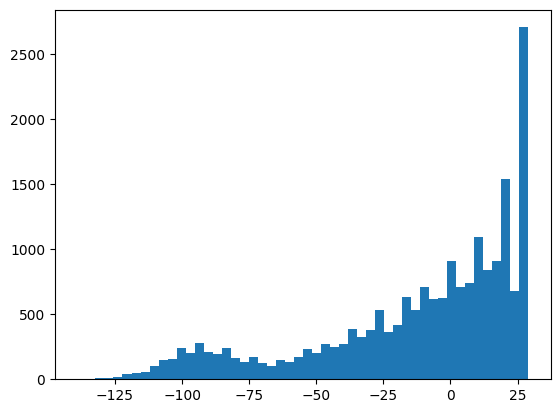

<Figure size 640x480 with 0 Axes>

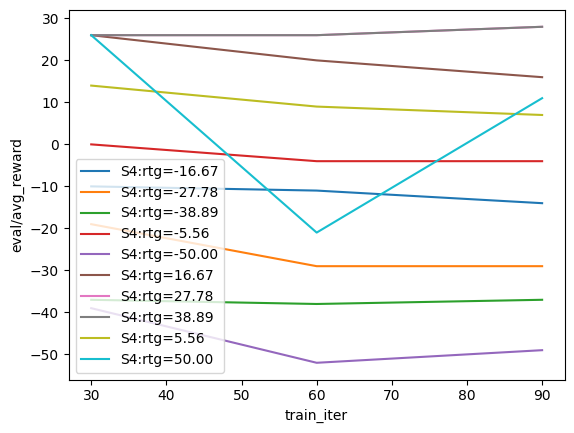

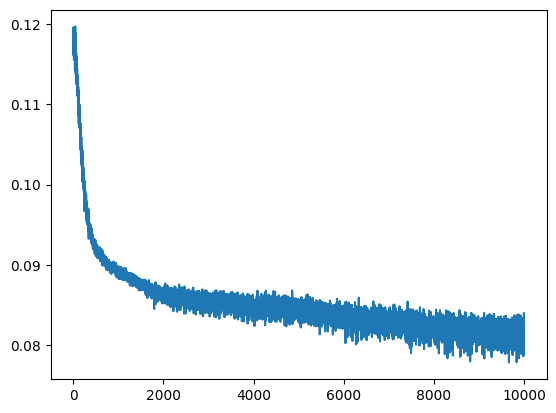

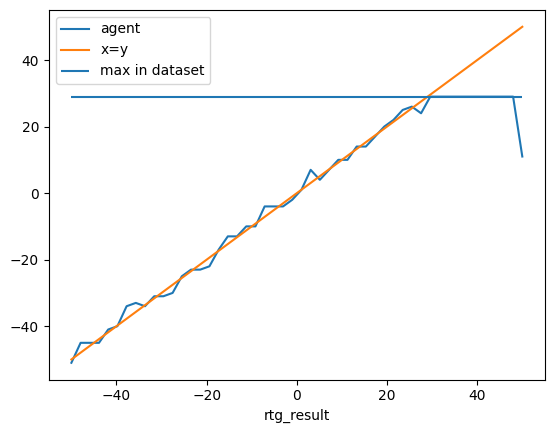

In [6]:
comparison_experiment.run_and_report(comparison_experiment.s4_experiment, epoch)

/Users/kaustubhdighe/Documents/MIT/6.8200/project/final_experiments/../algorithms/sequence_models/decision_S4/s4.py:155: SyntaxWarning: invalid escape sequence '\s'
  """
/Users/kaustubhdighe/Documents/MIT/6.8200/project/final_experiments/../algorithms/sequence_models/decision_S4/s4.py:167: SyntaxWarning: invalid escape sequence '\s'
  """
CUDA extension for structured kernels (Cauchy and Vandermonde multiplication) not found. Install by going to extensions/kernels/ and running `python setup.py install`, for improved speed and memory efficiency. Note that the kernel changed for state-spaces 4.0 and must be recompiled.


distribution of rewards in the dataset
training started


  0%|          | 0/100 [00:00<?, ?it/s]

time elapsed: 0:00:13
num of updates: 100
loss: 0.28714
lr 0.00001
grad_norm 0.18979
time elapsed: 0:00:25
num of updates: 200
loss: 0.14977
lr 0.00002
grad_norm 0.14641
time elapsed: 0:00:38
num of updates: 300
loss: 0.10071
lr 0.00003
grad_norm 0.07746
time elapsed: 0:00:51
num of updates: 400
loss: 0.09653
lr 0.00004
grad_norm 0.09162
time elapsed: 0:01:04
num of updates: 500
loss: 0.09460
lr 0.00005
grad_norm 0.10740
time elapsed: 0:01:16
num of updates: 600
loss: 0.09318
lr 0.00006
grad_norm 0.11018
time elapsed: 0:01:29
num of updates: 700
loss: 0.09191
lr 0.00007
grad_norm 0.10471
time elapsed: 0:01:42
num of updates: 800
loss: 0.09077
lr 0.00008
grad_norm 0.10441
time elapsed: 0:01:55
num of updates: 900
loss: 0.08959
lr 0.00009
grad_norm 0.09922
time elapsed: 0:02:08
num of updates: 1000
loss: 0.08862
lr 0.00010
grad_norm 0.08790
time elapsed: 0:02:21
num of updates: 1100
loss: 0.08794
lr 0.00011
grad_norm 0.09620
time elapsed: 0:02:34
num of updates: 1200
loss: 0.08734
lr 0.0

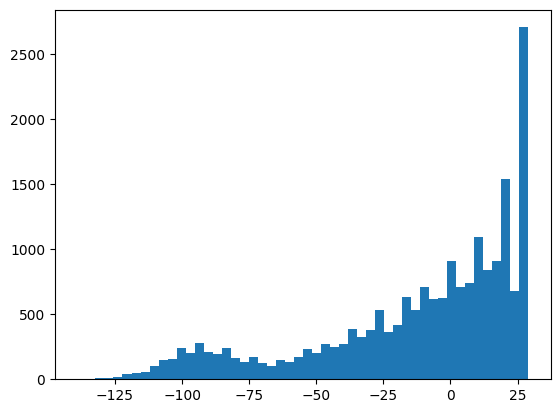

<Figure size 640x480 with 0 Axes>

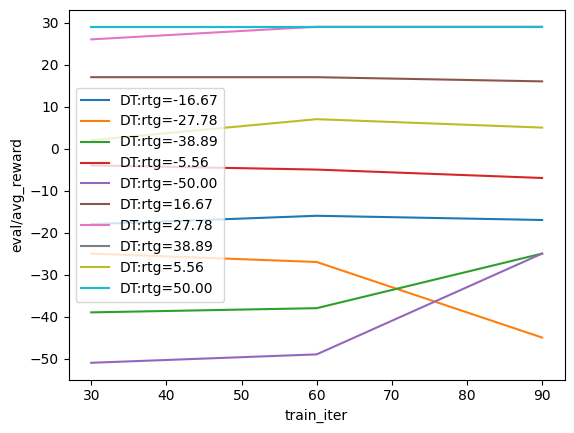

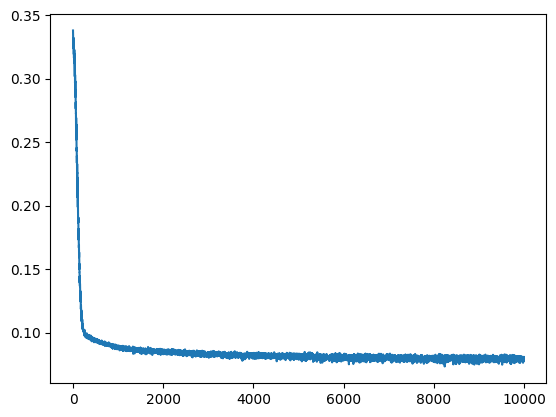

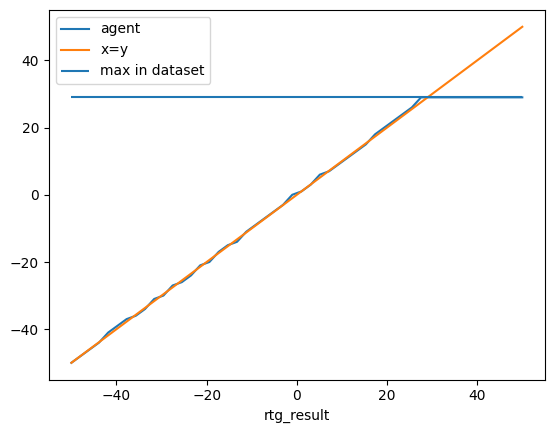

In [7]:
comparison_experiment.run_and_report(comparison_experiment.dt_experiment, epoch)

In [10]:
from algorithms.evaluate_policy import evaluate_policy

policy = comparison_experiment.make_dt_policy(rtg=0)
print(evaluate_policy(policy, env, num_eval_ep=20))

policy = comparison_experiment.make_s4_policy(rtg=0)
print(evaluate_policy(policy, env, num_eval_ep=20))

/Users/kaustubhdighe/Documents/MIT/6.8200/project/final_experiments/../algorithms/sequence_models/decision_S4/s4.py:155: SyntaxWarning: invalid escape sequence '\s'
  """
/Users/kaustubhdighe/Documents/MIT/6.8200/project/final_experiments/../algorithms/sequence_models/decision_S4/s4.py:167: SyntaxWarning: invalid escape sequence '\s'
  """
CUDA extension for structured kernels (Cauchy and Vandermonde multiplication) not found. Install by going to extensions/kernels/ and running `python setup.py install`, for improved speed and memory efficiency. Note that the kernel changed for state-spaces 4.0 and must be recompiled.


{'eval/avg_reward': 1.0, 'eval/avg_ep_len': 9.0}
{'eval/avg_reward': 1.0, 'eval/avg_ep_len': 4.0}


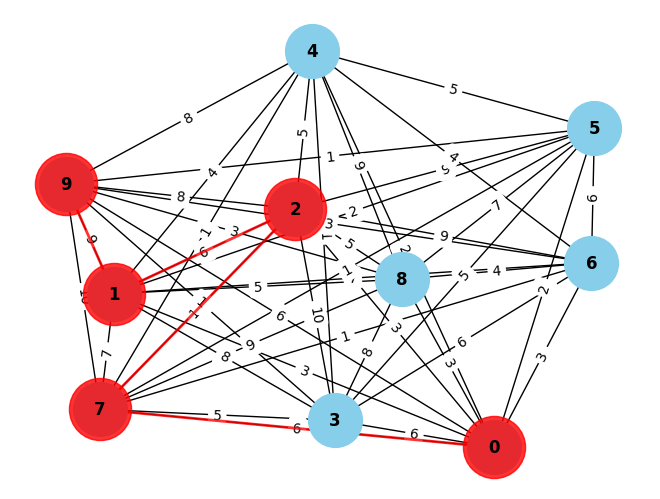

In [11]:
env.render()